Sampling method: uniform


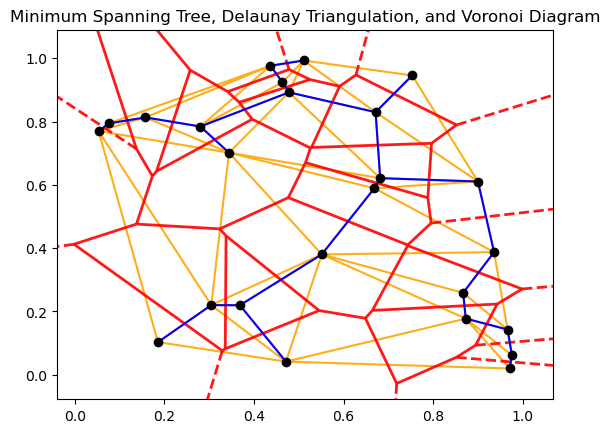

Sampling method: normal


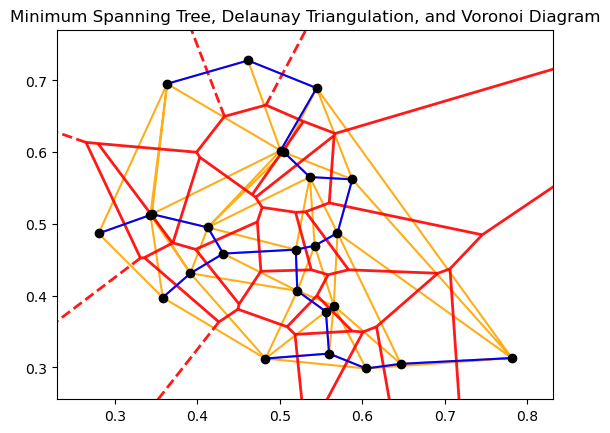

Sampling method: exponential


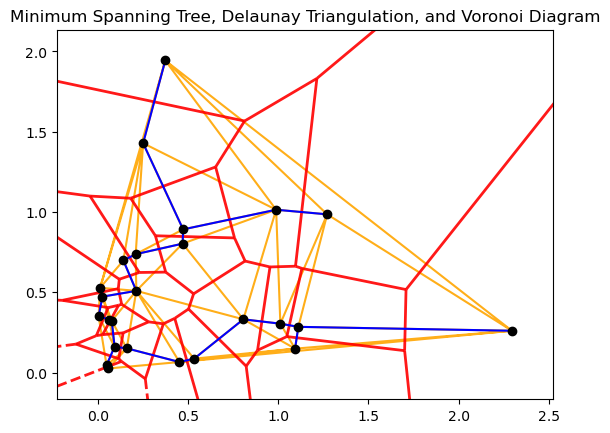

Sampling method: beta


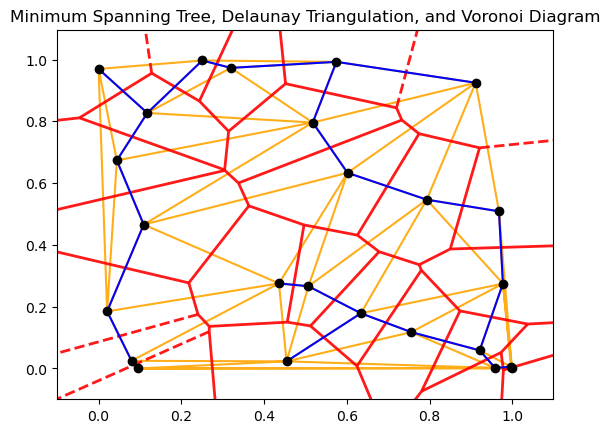

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import Voronoi, voronoi_plot_2d, Delaunay
from scipy.sparse.csgraph import minimum_spanning_tree

def plot_mst_voronoi(points):
    # Compute VD
    vor = Voronoi(points)
    
    # Plot VD
    fig, ax = plt.subplots()
    voronoi_plot_2d(vor, ax=ax, show_vertices=False, line_colors='red', line_width=2, line_alpha=0.9, point_size=2)
    
    # Compute DT and plot it
    tri = Delaunay(points)
    ax.triplot(points[:, 0], points[:, 1], tri.simplices, color='orange', alpha=0.9)
    
    # Create the distance matrix for edges
    edges = set()
    for simplex in tri.simplices:
        for i in range(3):
            for j in range(i+1, 3):
                edges.add(tuple(sorted([simplex[i], simplex[j]])))
    
    num_points = len(points)
    dist_matrix = np.full((num_points, num_points), np.inf)
    for i, j in edges:
        dist = np.linalg.norm(points[i] - points[j])
        dist_matrix[i, j] = dist_matrix[j, i] = dist
    
    # Compute MST
    mst = minimum_spanning_tree(dist_matrix)
    mst_edges = np.array(mst.nonzero()).T
    
    # Plot MST
    for i, j in mst_edges:
        plt.plot([points[i, 0], points[j, 0]], [points[i, 1], points[j, 1]], 'b-')
    
    # Plot points
    plt.plot(points[:, 0], points[:, 1], 'ko')
    
    plt.title('Minimum Spanning Tree, Delaunay Triangulation, and Voronoi Diagram')
    plt.show()

# Sampling configurations (change as required)
sampling_methods = {
    'uniform': lambda: np.random.rand(25, 2),
    'normal': lambda: np.random.normal(loc=0.5, scale=1/8, size=(25, 2)),
    'exponential': lambda: np.random.exponential(scale=1/2, size=(25, 2)),
    'beta': lambda: np.random.beta(a=0.5, b=0.5, size=(25, 2))
}

# Loop over sampling methods
for method_name, sampling_func in sampling_methods.items():
    print(f"Sampling method: {method_name}")
    points = sampling_func()
    plot_mst_voronoi(points)



Sampling method: uniform


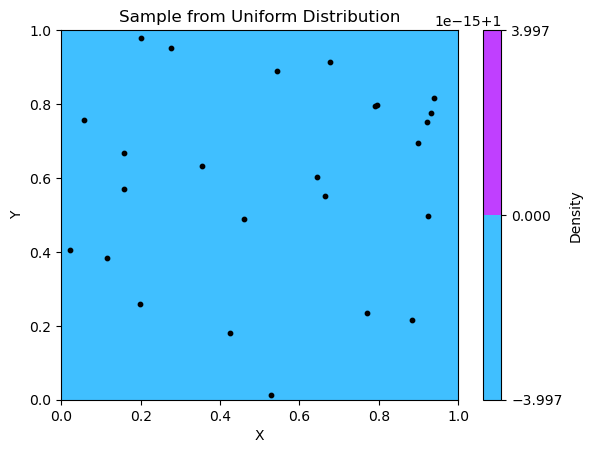

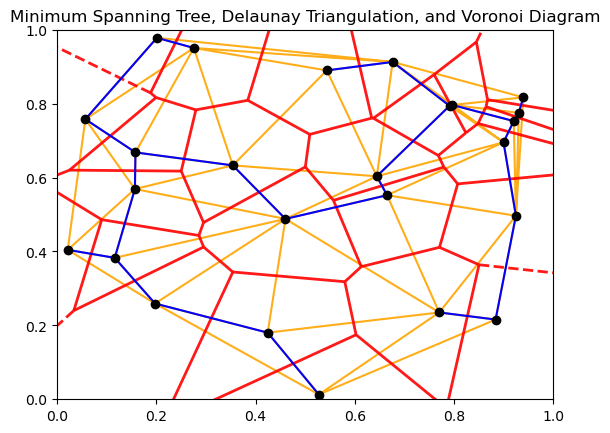

Sampling method: normal


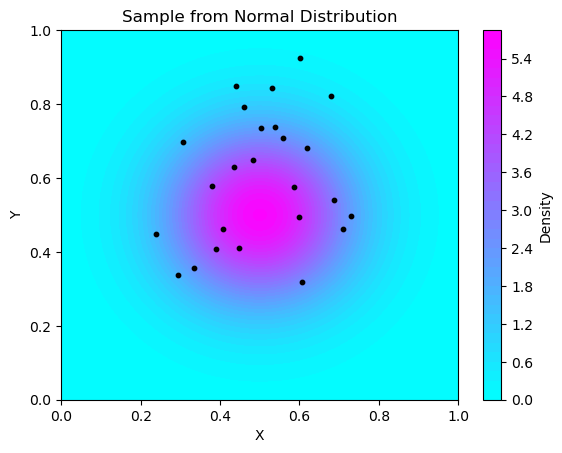

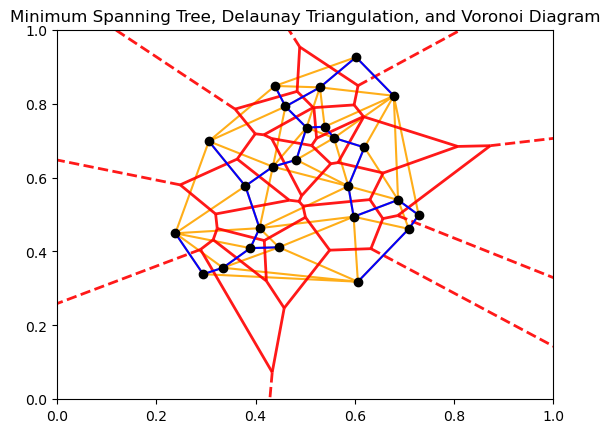

Sampling method: exponential


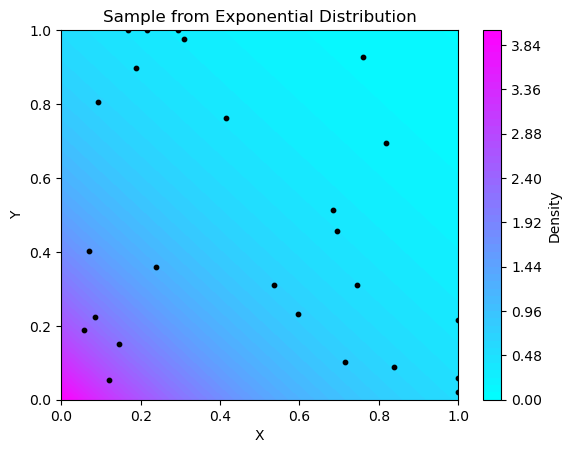

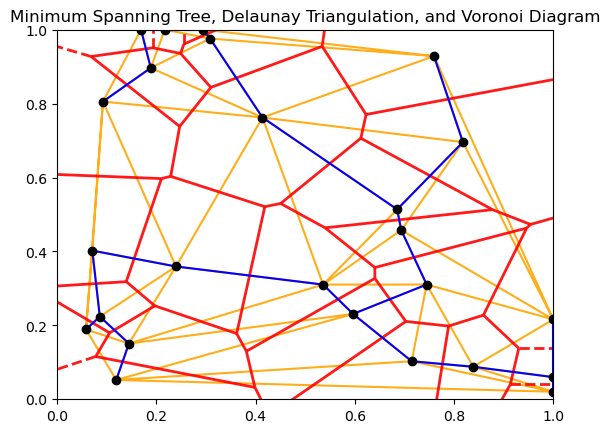

Sampling method: beta


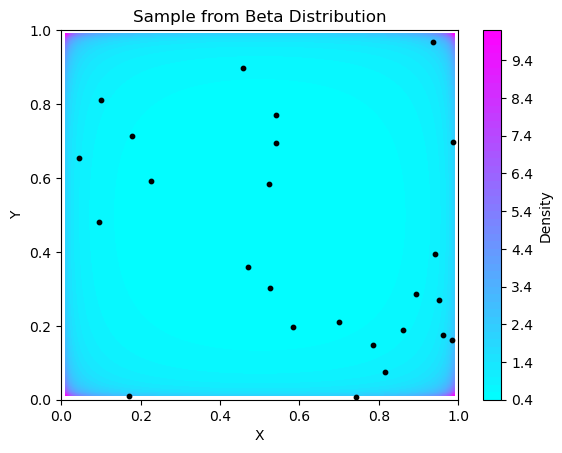

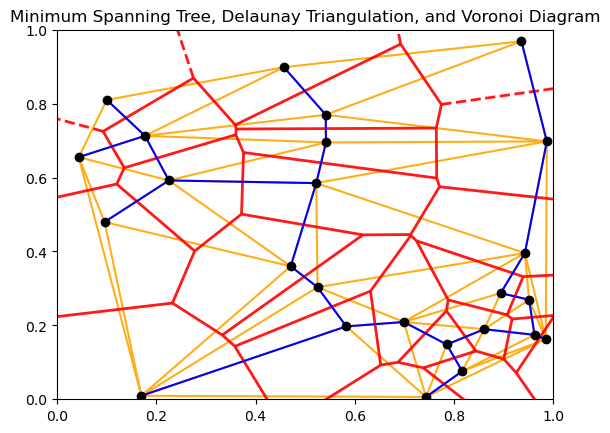

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import Voronoi, voronoi_plot_2d, Delaunay
from scipy.sparse.csgraph import minimum_spanning_tree
from scipy.stats import norm, expon, beta

def plot_distribution(points, title, dist_func):
    plt.figure()
    x = np.linspace(0, 1, 100)
    y = np.linspace(0, 1, 100)
    X, Y = np.meshgrid(x, y)
    
    if title == 'Uniform':
        Z = np.ones_like(X)
    else:
        Z = dist_func.pdf(X) * dist_func.pdf(Y)
    
    plt.contourf(X, Y, Z, levels=50, cmap='cool')
    plt.colorbar(label='Density')
    plt.scatter(points[:, 0], points[:, 1], color='black', s=10)
    plt.title(f'Sample from {title} Distribution')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.xlim(0, 1)
    plt.ylim(0, 1)
    plt.show()

def plot_mst_voronoi(points):
    # Compute VD
    vor = Voronoi(points)
    
    # Plot VD
    fig, ax = plt.subplots()
    voronoi_plot_2d(vor, ax=ax, show_vertices=False, line_colors='red', line_width=2, line_alpha=0.9, point_size=2)
    
    # Compute DT and plot it
    tri = Delaunay(points)
    ax.triplot(points[:, 0], points[:, 1], tri.simplices, color='orange', alpha=0.9)
    
    # Create the distance matrix for edges
    edges = set()
    for simplex in tri.simplices:
        for i in range(3):
            for j in range(i+1, 3):
                edges.add(tuple(sorted([simplex[i], simplex[j]])))
    
    num_points = len(points)
    dist_matrix = np.full((num_points, num_points), np.inf)
    for i, j in edges:
        dist = np.linalg.norm(points[i] - points[j])
        dist_matrix[i, j] = dist_matrix[j, i] = dist
    
    # Compute MST
    mst = minimum_spanning_tree(dist_matrix)
    mst_edges = np.array(mst.nonzero()).T
    
    # Plot MST
    for i, j in mst_edges:
        plt.plot([points[i, 0], points[j, 0]], [points[i, 1], points[j, 1]], 'b-')
    
    # Plot points
    plt.plot(points[:, 0], points[:, 1], 'ko')
    plt.xlim(0, 1)
    plt.ylim(0, 1)
    
    plt.title('Minimum Spanning Tree, Delaunay Triangulation, and Voronoi Diagram')
    plt.show()

# Sampling configurations
sampling_methods = {
    'uniform': ('Uniform', lambda: np.random.rand(25, 2), None),
    'normal': ('Normal', lambda: np.clip(np.random.normal(loc=0.5, scale=1/6, size=(25, 2)), 0, 1), norm(loc=0.5, scale=1/6)),
    'exponential': ('Exponential', lambda: np.clip(np.random.exponential(scale=0.5, size=(25, 2)), 0, 1), expon(scale=0.5)),
    'beta': ('Beta', lambda: np.random.beta(a=0.5, b=0.5, size=(25, 2)), beta(a=0.5, b=0.5))
}

# Loop over sampling methods
for method_name, (title, sampling_func, dist_func) in sampling_methods.items():
    print(f"Sampling method: {method_name}")
    points = sampling_func()
    plot_distribution(points, title, dist_func)
    plot_mst_voronoi(points)
